# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
%matplotlib inline


import pickle
import random
import numpy as np
import matplotlib
from matplotlib import pyplot
import tensorflow as tf
from pandas.io.parsers import read_csv

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

sign_names = read_csv("signnames.csv").values[:, 1]

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Class 0: Speed limit (20km/h)                               


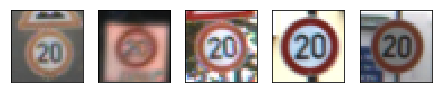

--------------------------------------------------------------------------------------

Class 1: Speed limit (30km/h)                               


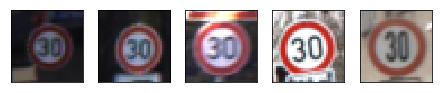

--------------------------------------------------------------------------------------

Class 2: Speed limit (50km/h)                               


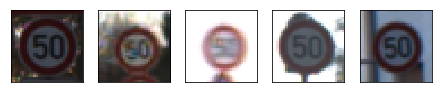

--------------------------------------------------------------------------------------

Class 3: Speed limit (60km/h)                               


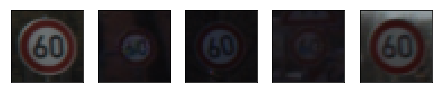

--------------------------------------------------------------------------------------

Class 4: Speed limit (70km/h)                               


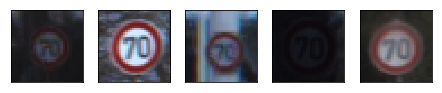

--------------------------------------------------------------------------------------

Class 5: Speed limit (80km/h)                               


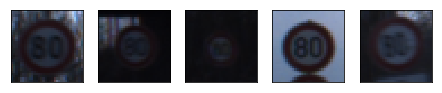

--------------------------------------------------------------------------------------

Class 6: End of speed limit (80km/h)                        


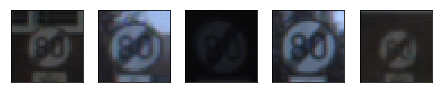

--------------------------------------------------------------------------------------

Class 7: Speed limit (100km/h)                              


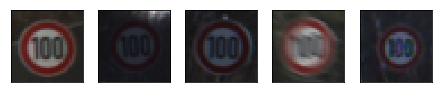

--------------------------------------------------------------------------------------

Class 8: Speed limit (120km/h)                              


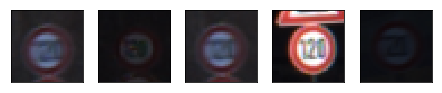

--------------------------------------------------------------------------------------

Class 9: No passing                                         


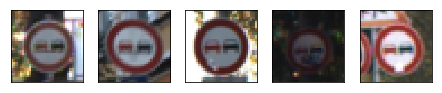

--------------------------------------------------------------------------------------

Class 10: No passing for vehicles over 3.5 metric tons       


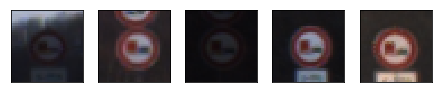

--------------------------------------------------------------------------------------

Class 11: Right-of-way at the next intersection              


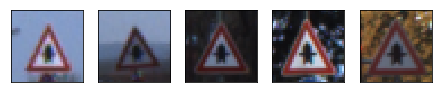

--------------------------------------------------------------------------------------

Class 12: Priority road                                      


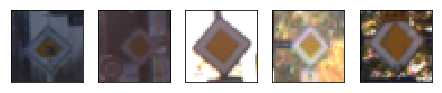

--------------------------------------------------------------------------------------

Class 13: Yield                                              


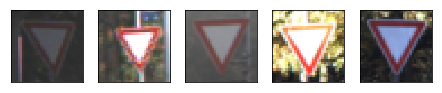

--------------------------------------------------------------------------------------

Class 14: Stop                                               


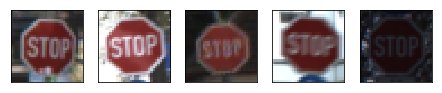

--------------------------------------------------------------------------------------

Class 15: No vehicles                                        


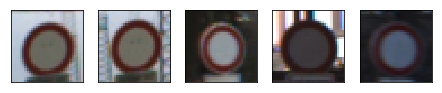

--------------------------------------------------------------------------------------

Class 16: Vehicles over 3.5 metric tons prohibited           


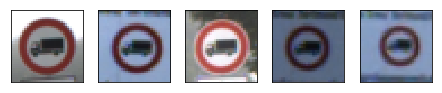

--------------------------------------------------------------------------------------

Class 17: No entry                                           


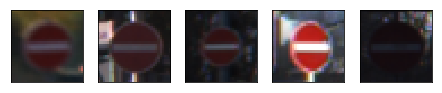

--------------------------------------------------------------------------------------

Class 18: General caution                                    


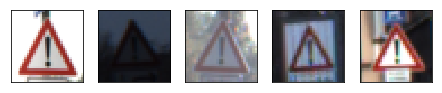

--------------------------------------------------------------------------------------

Class 19: Dangerous curve to the left                        


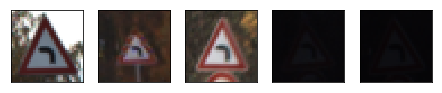

--------------------------------------------------------------------------------------

Class 20: Dangerous curve to the right                       


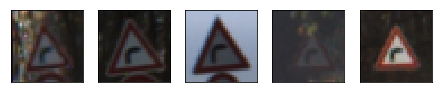

--------------------------------------------------------------------------------------

Class 21: Double curve                                       


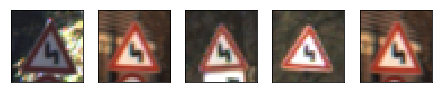

--------------------------------------------------------------------------------------

Class 22: Bumpy road                                         


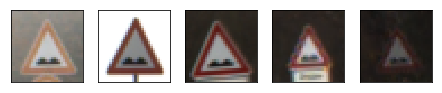

--------------------------------------------------------------------------------------

Class 23: Slippery road                                      


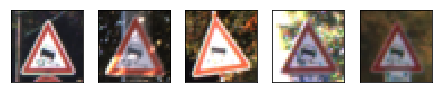

--------------------------------------------------------------------------------------

Class 24: Road narrows on the right                          


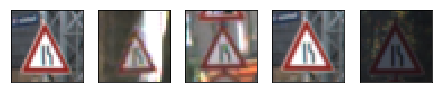

--------------------------------------------------------------------------------------

Class 25: Road work                                          


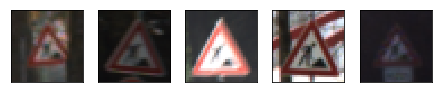

--------------------------------------------------------------------------------------

Class 26: Traffic signals                                    


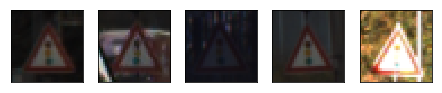

--------------------------------------------------------------------------------------

Class 27: Pedestrians                                        


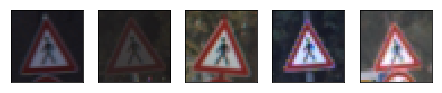

--------------------------------------------------------------------------------------

Class 28: Children crossing                                  


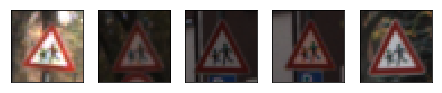

--------------------------------------------------------------------------------------

Class 29: Bicycles crossing                                  


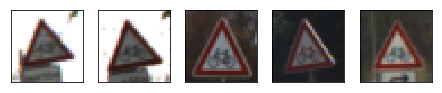

--------------------------------------------------------------------------------------

Class 30: Beware of ice/snow                                 


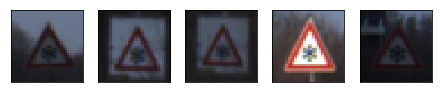

--------------------------------------------------------------------------------------

Class 31: Wild animals crossing                              


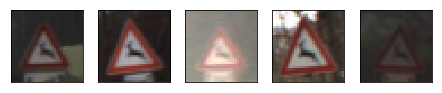

--------------------------------------------------------------------------------------

Class 32: End of all speed and passing limits                


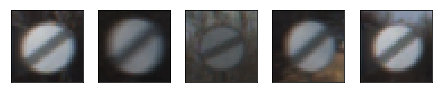

--------------------------------------------------------------------------------------

Class 33: Turn right ahead                                   


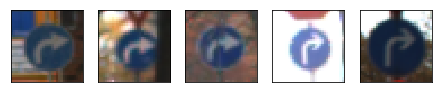

--------------------------------------------------------------------------------------

Class 34: Turn left ahead                                    


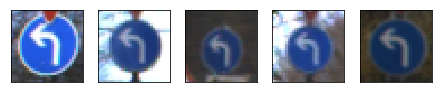

--------------------------------------------------------------------------------------

Class 35: Ahead only                                         


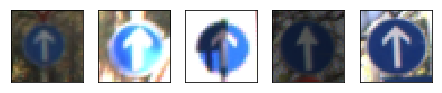

--------------------------------------------------------------------------------------

Class 36: Go straight or right                               


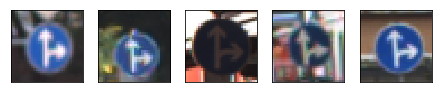

--------------------------------------------------------------------------------------

Class 37: Go straight or left                                


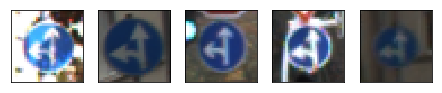

--------------------------------------------------------------------------------------

Class 38: Keep right                                         


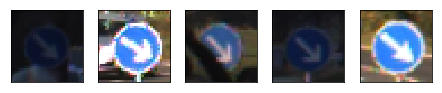

--------------------------------------------------------------------------------------

Class 39: Keep left                                          


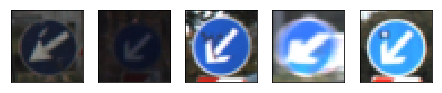

--------------------------------------------------------------------------------------

Class 40: Roundabout mandatory                               


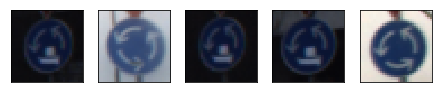

--------------------------------------------------------------------------------------

Class 41: End of no passing                                  


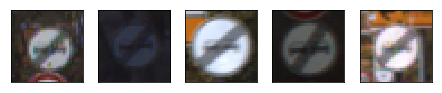

--------------------------------------------------------------------------------------

Class 42: End of no passing by vehicles over 3.5 metric tons 


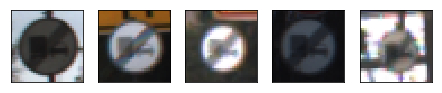

--------------------------------------------------------------------------------------



In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



#Globals
IMG_SIZE = image_shape[0]  # square image of size IMG_SIZE x IMG_SIZE
GRAYSCALE = True  # convert image to grayscale?
INPUT_CHANNELS = 1 if GRAYSCALE else image_shape[2]
NUM_CLASSES = n_classes

import random

col_width = max(len(name) for name in sign_names)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i: %-*s " % (c, col_width, sign_names[c]))
    fig = pyplot.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 5)
    for i in range(5):
        axis = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    pyplot.show()
    print("--------------------------------------------------------------------------------------\n")
    


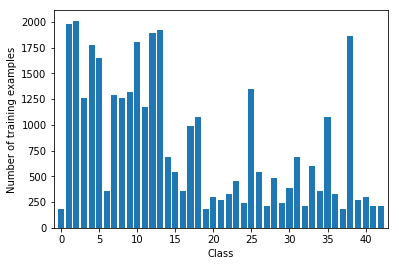

In [4]:
pyplot.bar( np.arange( 43 ), class_counts, align='center' )
pyplot.xlabel('Class')
pyplot.ylabel('Number of training examples')
pyplot.xlim([-1, 43])
pyplot.show()

Number of training examples = 34799
Number of testing examples = 12630


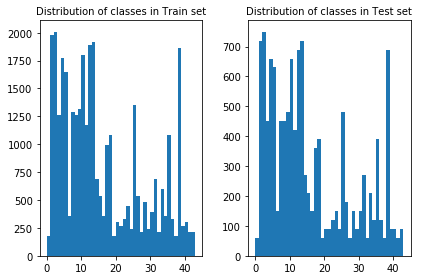

In [5]:
fig, (ax1, ax2) = pyplot.subplots(nrows=1, ncols=2)
ax1.set_title('Train', fontsize=8)

bins = range(n_classes + 1)
ax1.hist(y_train, bins=bins)
ax1.set_title('Distribution of classes in Train set', fontsize=10)

ax2.hist(y_test, bins=bins)
ax2.set_title('Distribution of classes in Test set', fontsize=10)

pyplot.tight_layout()

print("Number of training examples =", len(y_train))
print("Number of testing examples =", len(y_test))  

Number of training examples = 50879
Number of testing examples = 12630


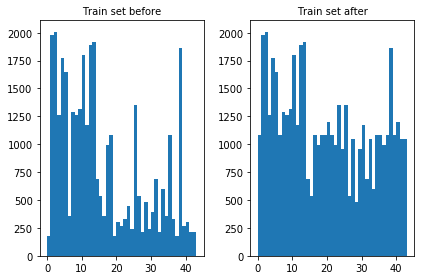

In [5]:
### Data augmentation

import cv2

DATA_AUGMENTATION = True

import random
random.seed(a=42)

rotation = 15

def generate_sample(im):
    angle = random.uniform(0.0, 2*rotation) - rotation
    M = cv2.getRotationMatrix2D((im.shape[0]/2, im.shape[1]/2), angle, 1)
    return cv2.warpAffine(im,M,(im.shape[0],im.shape[1]))   

def get_class_samples(hist, X_data, y_data):
    
    class_dict = dict()
    class_set = set()
    
    h_min = np.min(hist)
    h_max = np.max(hist)

    target = int((h_max - h_min) / 4)

    for i in range(len(X_data)):
        cls_n = y_data[i]
        num = hist[cls_n]
        if num < target:
            item = class_dict.get(str(cls_n))
            if item is None:
                class_dict[str(cls_n)] = list()
            item = class_dict[str(cls_n)]
            item.append(X_data[i])
            class_set.add(cls_n)
            
    return class_dict, class_set

def data_augmentation(hist, X_data, y_data):
    X_gen = list()
    y_gen = list()
    
    counter_cls_dict = dict()

    h_min = np.min(hist)
    h_max = np.max(hist)

    target = int((h_max - h_min)/2)
    
    train_dict, train_cls = get_class_samples(hist, X_data, y_data)
    for cls in train_cls:
        samples = train_dict[str(cls)]
        n_samples = len(samples)
        
        count = int(target / n_samples)
        counter_cls_dict[str(cls)] = count
        
        for n in range(count):
            for im in samples:
                X_gen.append(generate_sample(im))
                y_gen.append(cls)
            
    X_gen = np.asarray(X_gen, dtype=X_train.dtype)
    y_gen = np.asarray(y_gen, dtype=y_train.dtype)
  
    counter_cls_dict['classes_set'] = train_cls
    
    return X_gen, y_gen, counter_cls_dict


# Do data augmentation
if DATA_AUGMENTATION:
    
    global X_train
    global y_train
    
    y_train_init = y_train
    
    train_hist = np.histogram(y_train, bins=range(n_classes+1))
    X_gen, y_gen, counter_cls_dict = data_augmentation(train_hist[0], X_train, y_train)
    assert (len(X_gen)==len(y_gen))
    if (len(X_gen)):
        X_train = np.append(X_train, X_gen, axis=0)
        y_train = np.append(y_train, y_gen, axis=0)
        train_hist = np.histogram(y_train, bins=range(n_classes+1))

    fig, (ax1, ax2) = pyplot.subplots(nrows=1, ncols=2)
    ax1.set_title('Train', fontsize=8)

    bins = range(n_classes+1)
    ax1.hist(y_train_init, bins=bins)
    ax1.set_title('Train set before', fontsize=10)

    ax2.hist(y_train, bins=bins)
    ax2.set_title('Train set after', fontsize=10)

    pyplot.tight_layout()
    
n_train = len(y_train)

print("Number of training examples =", len(y_train))
print("Number of testing examples =", len(y_test))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from skimage import exposure
import warnings 

num_classes = 43

def preprocess(X, y = None):
    
    print("Preprocessing dataset with {} examples:".format(X.shape[0]))

    #Convert to grayscale, e.g. single channel Y
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)
        
    if y is not None:  
        # Convert to one-hot encoding. Convert back with `y = y.nonzero()[1]`
        y = np.eye(num_classes)[y]
        X, y = shuffle(X, y)

    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,)) 
    return X, y
    
# Preprocess
X_train, y_train = preprocess(X_train, y_train)
X_test, y_test = preprocess(X_test, y_test)




Preprocessing dataset with 50879 examples:
Preprocessing dataset with 12630 examples:


In [12]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Size of training set =", X_train.shape)
print("Size of validation set =", X_validation.shape)

Size of training set = (40703, 32, 32, 1)
Size of validation set = (10176, 32, 32, 1)


### Model Architecture

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

L2_Lambda = 0.00001
# l2_reg = True

def LeNet(x, input_channels, keep_prob=0.5, dropout=True):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, input_channels, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

   
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # dropout
    if dropout:
        fc1 = tf.nn.dropout(fc1, keep_prob)
        

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # dropout
    if dropout:
        fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, NUM_CLASSES), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(NUM_CLASSES))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    # L2 regularization
    l2reg = L2_Lambda * tf.nn.l2_loss(conv1_W) + L2_Lambda * tf.nn.l2_loss(conv1_b) 
    l2reg = l2reg + L2_Lambda * tf.nn.l2_loss(conv2_W) + L2_Lambda * tf.nn.l2_loss(conv2_b)
    l2reg = l2reg + L2_Lambda * tf.nn.l2_loss(fc1_W) + L2_Lambda * tf.nn.l2_loss(fc1_b)
    l2reg = l2reg + L2_Lambda * tf.nn.l2_loss(fc2_W) + L2_Lambda * tf.nn.l2_loss(fc2_b)
    l2reg = l2reg + L2_Lambda * tf.nn.l2_loss(fc3_W) + L2_Lambda * tf.nn.l2_loss(fc3_b)
        
    return logits, l2reg

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
# Parameters
rate = 0.001


# Dropout
keep_prob  = tf.placeholder(tf.float32)
keep_prob_val = 0.5


x = tf.placeholder(tf.float32, (None, 32, 32, INPUT_CHANNELS))
y = tf.placeholder(tf.int32, (None))

# Training pipeline
logits, l2reg = LeNet(x, INPUT_CHANNELS, keep_prob, dropout=True)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)

loss_operation = tf.reduce_mean(cross_entropy + l2reg)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
### Train your model here.
### Feel free to use as many code cells as needed.

RESTORE = True
EPOCHS = 50
BATCH_SIZE = 128

with tf.Session() as sess:
    saver = tf.train.Saver()
    
    if RESTORE:
        print('Restoring previously trained model')
        # Restore previously trained model
        saver.restore(sess, './traffic_sign')
    else:
        sess.run(tf.global_variables_initializer())
    
    num_examples = len(X_train)
    
    print("learning rate             = ", rate)
    print("batch size                = ", BATCH_SIZE)
    print("total epochs              = ", EPOCHS)
    print("dropout keep probability  = ", keep_prob_val)
    print()
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_val})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        train_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print()
        
    saver.save(sess, './traffic_sign')
    print("Model saved")

learning rate             =  0.001
batch size                =  128
total epochs              =  50
dropout keep probability  =  0.5

Training...

EPOCH 1 ...
Validation Accuracy = 0.685
Train Accuracy = 0.699

EPOCH 2 ...
Validation Accuracy = 0.834
Train Accuracy = 0.842

EPOCH 3 ...
Validation Accuracy = 0.891
Train Accuracy = 0.900

EPOCH 4 ...
Validation Accuracy = 0.920
Train Accuracy = 0.929

EPOCH 5 ...
Validation Accuracy = 0.926
Train Accuracy = 0.937

EPOCH 6 ...
Validation Accuracy = 0.943
Train Accuracy = 0.954

EPOCH 7 ...
Validation Accuracy = 0.948
Train Accuracy = 0.957

EPOCH 8 ...
Validation Accuracy = 0.958
Train Accuracy = 0.968

EPOCH 9 ...
Validation Accuracy = 0.963
Train Accuracy = 0.973

EPOCH 10 ...
Validation Accuracy = 0.965
Train Accuracy = 0.974

EPOCH 11 ...
Validation Accuracy = 0.968
Train Accuracy = 0.976

EPOCH 12 ...
Validation Accuracy = 0.976
Train Accuracy = 0.983

EPOCH 13 ...
Validation Accuracy = 0.973
Train Accuracy = 0.982

EPOCH 14 ...
Vali

In [16]:
with tf.Session() as sess:
    saver.restore(sess, './traffic_sign')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./traffic_sign
Test Accuracy = 0.942


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

New test images: 
Preprocessing dataset with 10 examples:


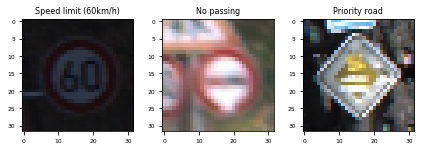

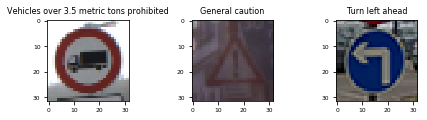

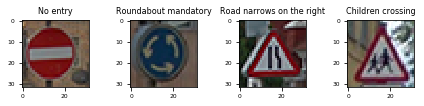

In [79]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# import scipy.ndimage
# from glob import glob

print("New test images: ")

import cv2

def read_image_rgb(file):
    # returns BGR
    srcBGR = cv2.imread(file)
    return cv2.cvtColor(srcBGR, cv2.COLOR_BGR2RGB)

new_images_set = [['test-images/ex-3.png', 3],
                  ['test-images/ex-9.png', 9],
                  ['test-images/ex-12.png', 12],
                  ['test-images/ex-16.png', 16],
                  ['test-images/ex-18.png', 18],
                  ['test-images/example_00010.png', 34],
                  ['test-images/example_00014.png', 17],
                  ['test-images/example_00029.png', 40],
                  ['test-images/example_00034.png', 24],
                  ['test-images/example_00023.png', 28],
                 ]

n_new_images = len(new_images_set)
my_labels = [3, 9, 12, 16, 18, 34, 17, 40, 24, 28]

X_test_new = np.ndarray((n_new_images, 32, 32, 3), dtype=np.uint8)
y_test_new = np.zeros((n_new_images), dtype=y_test.dtype)

new_images = X_test_new

# load samples
for i, im, in enumerate(new_images_set):
    n_class = im[1]
    X_test_new [i] = read_image_rgb(im[0])
    y_test_new [i] = n_class
    
# display samples
def display_sample(ax, index):
    ax.set_title(sign_names[int(y_test_new[index])], fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.imshow(X_test_new[index])
    
fig, (ax1, ax2, ax3) = pyplot.subplots(nrows=1, ncols=3)

display_sample(ax1, 0)
display_sample(ax2, 1)
display_sample(ax3, 2)


pyplot.tight_layout()    
fig, (ax4, ax5, ax6) = pyplot.subplots(nrows=1, ncols=3)
display_sample(ax4, 3)
display_sample(ax5, 4)
display_sample(ax6, 5)

pyplot.tight_layout()

pyplot.tight_layout()    
fig, (ax7, ax8, ax9, ax10) = pyplot.subplots(nrows=1, ncols=4)
display_sample(ax7, 6)
display_sample(ax8, 7)
display_sample(ax9, 8)
display_sample(ax10, 9)

pyplot.tight_layout()

X_test_new_processed, _ = np.array(preprocess(X_test_new))

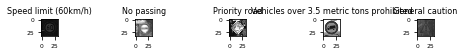

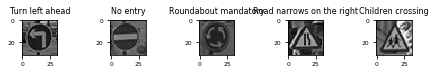

In [71]:
def display_sample(ax, index):
    ax.set_title(sign_names[int(y_test_new[index])], fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    gr = np.squeeze(X_test_new_processed[index], axis=2)
    ax.imshow(np.dstack((gr,gr,gr)))

# Preprocessed samples
fig, (ax1, ax2, ax3, ax4, ax5) = pyplot.subplots(nrows=1, ncols=5)

display_sample(ax1, 0)
display_sample(ax2, 1)
display_sample(ax3, 2)
display_sample(ax4, 3)
display_sample(ax5, 4)

pyplot.tight_layout()

fig, (ax1, ax2, ax3, ax4, ax5) = pyplot.subplots(nrows=1, ncols=3)

display_sample(ax1, 5)
display_sample(ax2, 6)
display_sample(ax3, 7)
display_sample(ax4, 8)
display_sample(ax5, 9)

pyplot.tight_layout()

### Predict the Sign Type for Each Image

Shape of X_test_new_processed =  (10, 32, 32, 1)
INFO:tensorflow:Restoring parameters from ./traffic_sign
Image 1
Actual Class: Speed limit (60km/h)
prob 99.9999523163
prob 4.45272718252e-05
prob 3.33199405567e-09
prob 5.40262496199e-10
prob 2.15472496616e-10


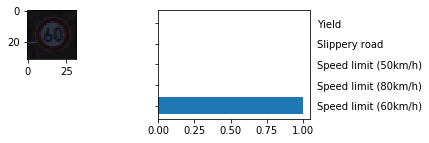

Image 2
Actual Class: No passing
prob 100.0
prob 1.30407905776e-17
prob 1.11445113351e-17
prob 8.78004661379e-20
prob 1.26631888922e-21


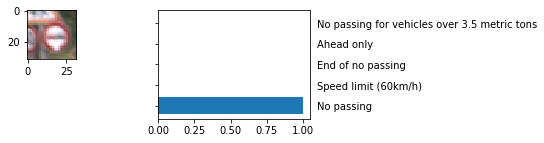

Image 3
Actual Class: Priority road
prob 100.0
prob 1.0369607395e-07
prob 6.11643791171e-09
prob 1.25060474129e-09
prob 1.20529896827e-09


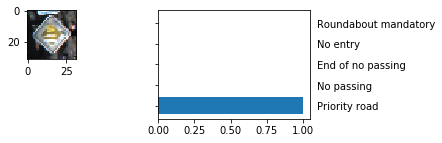

Image 4
Actual Class: Vehicles over 3.5 metric tons prohibited
prob 100.0
prob 3.96371102607e-08
prob 1.50260540122e-08
prob 1.13489072469e-11
prob 5.86921834647e-14


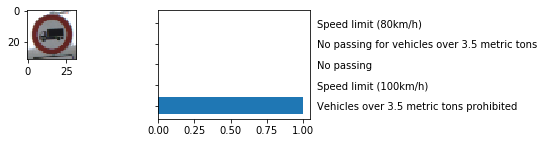

Image 5
Actual Class: General caution
prob 99.5429158211
prob 0.453382404521
prob 0.00300612900901
prob 0.000428498105975
prob 0.000128526517074


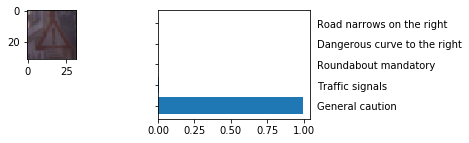

Image 6
Actual Class: Turn left ahead
prob 100.0
prob 3.48957462926e-07
prob 4.64835947511e-09
prob 1.33483599608e-10
prob 1.11309494065e-11


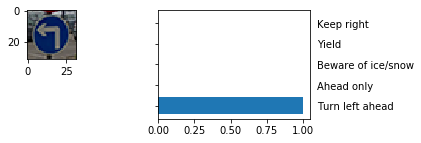

Image 7
Actual Class: No entry
prob 99.9927043915
prob 0.00729266248527
prob 8.0830281704e-10
prob 1.24708771955e-10
prob 5.71945811025e-11


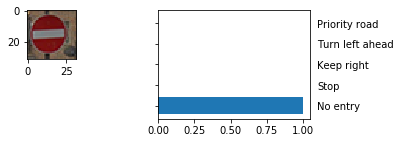

Image 8
Actual Class: Roundabout mandatory
prob 99.9831438065
prob 0.00729601306375
prob 0.00455668050563
prob 0.00430406507803
prob 0.000618614103587


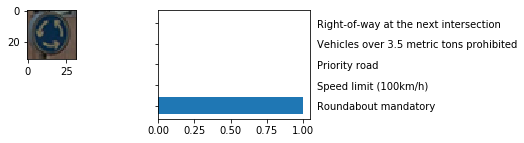

Image 9
Actual Class: Road narrows on the right
prob 99.9993681908
prob 0.000610420147495
prob 2.59968800265e-05
prob 1.98589167333e-07
prob 4.2120345406e-09


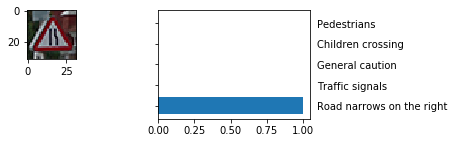

Image 10
Actual Class: Children crossing
prob 98.5637128353
prob 1.30415027961
prob 0.0788158504292
prob 0.0404213671573
prob 0.00656075062579


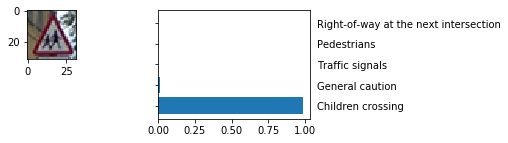

In [69]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Run the predictions here.
### Feel free to use as many code cells as needed.

import matplotlib.gridspec as gridspec
print("Shape of X_test_new_processed = ", X_test_new_processed.shape)

predicted_labels = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, './traffic_sign')
    p = sess.run(predicted_labels, feed_dict={x: X_test_new_processed, keep_prob: 1.0})
    top = sess.run(tf.nn.top_k(tf.constant(p), k=5))
    
def plot_prediction(image, prediction, class_label):
    # Prepare the grid
    pyplot.figure(figsize = (6, 2))
    gridspec.GridSpec(2, 2)
    
    pyplot.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
    pyplot.imshow(image)
    
    # Plot predictions
    pyplot.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=2)
    pyplot.barh(np.arange(5)+.5, prediction, align='center')
    pyplot.yticks(np.arange(5)+.5, sign_names[class_label])
    pyplot.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='on')
    pyplot.show()

count = 1 
for image, p,c in zip(X_test_new, top[0], top[1]):
    print("Image", count)
    print("Actual Class:", sign_names[int(y_test_new[count-1])])
    for prob in p:
        print("prob", prob*100)
    plot_prediction(image, p, c)
    count +=1
    


### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [70]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    p = sess.run(predicted_labels, feed_dict={x: X_test_new_processed, keep_prob: 1.0})
    top = sess.run(tf.nn.top_k(p, k=5))
    print(top)
    

INFO:tensorflow:Restoring parameters from .\traffic_sign
TopKV2(values=array([[  9.99999523e-01,   4.45272718e-07,   3.33199406e-11,
          5.40262496e-12,   2.15472497e-12],
       [  1.00000000e+00,   1.30407906e-19,   1.11445113e-19,
          8.78004661e-22,   1.26631889e-23],
       [  1.00000000e+00,   1.03696074e-09,   6.11643791e-11,
          1.25060474e-11,   1.20529897e-11],
       [  1.00000000e+00,   3.96371103e-10,   1.50260540e-10,
          1.13489072e-13,   5.86921835e-16],
       [  9.95429158e-01,   4.53382405e-03,   3.00612901e-05,
          4.28498106e-06,   1.28526517e-06],
       [  1.00000000e+00,   3.48957463e-09,   4.64835948e-11,
          1.33483600e-12,   1.11309494e-13],
       [  9.99927044e-01,   7.29266249e-05,   8.08302817e-12,
          1.24708772e-12,   5.71945811e-13],
       [  9.99831438e-01,   7.29601306e-05,   4.55668051e-05,
          4.30406508e-05,   6.18614104e-06],
       [  9.99993682e-01,   6.10420147e-06,   2.59968800e-07,
          1

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.